#Homework 5

In [9]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from math import exp

1) If we use trapezoid rule to find the
$$\int \limits_{x=1}^{3} e^{-x} \; dx$$
using $10$ pieces. What would be our value and what is our bound on error? Verify that you actual error is within the bound your got.

In [4]:
b = 3.
a = 1.
n = 10.

def f(x):
    return exp(-x)

def fi(x):
    return -exp(-x)

def trap(a,b,p):
    h = (b-a)/p
    sum = (f(a)+f(b))/2
    for i in range(1,p):
        sum += f(a+(i*h))
    return sum*h

# Max error term at x=1, f"(1) = 1/e
error = (1./12.)*(((b-a)**3)/(n**2))*(1./exp(1.))
print "Value of trapezoid error estimate value = " + str(error)
print "Bound on error: |Er| <= " + str(error)
print "========================================================"
actual = fi(3)-fi(1)
trapezoid = trap(1.,3.,10)
print "Actual implicit differentiation value = " + str(actual)
print "Trapezoid estimation = " + str(trapezoid)
print str(actual) + " - " + str(trapezoid)
print " = |" + str(actual - trapezoid) + "| <= " + str(error)

Value of trapezoid error estimate value = 0.00245252960781
Bound on error: |Er| <= 0.00245252960781
Actual implicit differentiation value = 0.318092372804
Trapezoid estimation = 0.319151974514
0.318092372804 - 0.319151974514
 = |-0.00105960170994| <= 0.00245252960781


1.1) If we want to evaluate the integral in the previous question such that the answer is at most $10^{-6}$ from the real answer. How many pieces do we need?

In [7]:
def pieces(error):
    n = 1
    bound = abs((1./12.)*(((b-a)**3.)/(n**2.))*(1./exp(1.)))
    while (bound>=error):
        n+=1
        bound = abs((1./12.)*(((b-a)**3.)/(n**2.))*(1./exp(1.)))
    return n

needed = pieces(10**-6)
print "To have an answer at most 10^-6 from the real answer, we need " + str(needed) + " pieces."

To have an answer at most 10^-6 from the real answer, we need 496 pieces.


2) Simple linear regression. Fit the data in `prob2.txt` with a straight line. Plot to verify.

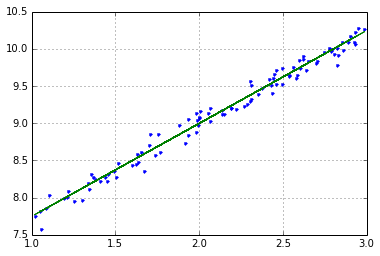

In [27]:
x, y = np.loadtxt('prob2.txt')

def cov(x,y):
    return e(x*y)-(e(x)*e(y))

def var(x):
    return e(x**2)-(e(x)**2)

def e(x):
    return np.sum(x)/len(x)
    
def equation(x,y):
    a = cov(x,y)/var(x)
    b = e(y)-(a*e(x))
    return a,b

a,b = equation(x,y)
y2 = [(a*xx)+b for xx in x]
plt.plot(x,y,'.')
plt.plot(x,y2)
plt.grid()

3) Simpson's rule. In the class, we learn how to use trapezoid rule to numerically the integral. In this problem you will find a better rule to evaluate the integral.

You will show this in the next problem that

$$\int \limits_{x=a}^{a+nh} f(x) \; dx \approx \frac{h}{3} \left(  f(x_0) + 4 \sum^{n-1}_{i=1,3,5\ldots} f(x_i) + 2 \sum^{n-2}_{j=2,4,6\ldots} f(x_j)+ f(x_n)\right) $$

where $x_i = a+ih$.




3.1) Use Simpson's Rule described above to find

$$\int \limits_{x=1}^{3} e^{-x} \; dx$$

using n = 10. This is the same integral as the one in problem 1.

In [30]:
def f(x):
    return exp(-x)

def simpson(a,b,n):
    h = (b-a)/n
    res = f(a)+f(b)
    for i in range(1,n):
        if (i%2==1):
            res += 4.*f(a+(i*h))
        else:
            res += 2.*f(a+(i*h))
    return res*(h/3.)

ans = simpson(1.,3.,10)
print "Integral value using Simpson's Rule = " + str(ans)

Integral value using Simpson's Rule = 0.318095186883


Now we will try to understand why the formula shown above works. The key idea is that instead of approximating the area under the curve using trapezoid shape. We will use parabola to approximate the shape. Let us consider a curve $f(x)$ that we want to integrate

$$\int \limits_{x=a}^{x=a+2h} f(x) \;dx$$

We will use parabola to approximate the area. This parabola will have to pass through three points.
    $$[x, f(x)], [x+h, f(x+h)], [x+2h, f(x+2h)]$$
    
Concretely, suppose that we want to calculate

$$\int \limits_{x=1}^{x=3} e^{-x} \;dx $$

with $h=1$. The parabola is shown below.

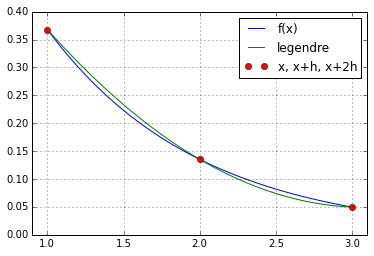

In [132]:
def f(x):
    return math.exp(-x)
#let h = 1
#we are interested in parabola that passes through
#(1, e^-1), (2, e^-2), (3, e^-3)
#We can us Legendre Polynomail for this.
def poly(x):
    #legendre polynomial that passes through (1, e^-1), (2, e^-2), (3, e^-3)
    return 0.74742 - 0.453038*x + 0.073498*x**2

x = np.linspace(1, 3,100)
ty = [f(xx) for xx in x]
py = [poly(xx) for xx in x]
plt.plot(x, ty, label='f(x)')
plt.plot(x,py, label='legendre')
plt.plot([1,2,3],[exp(-1),exp(-2),exp(-3)],'o',label=('x, x+h, x+2h'))
plt.xlim(0.9,3.1)
plt.grid()
plt.legend(loc='upper right')

3.2)From the picture above we can estimate the area of the blue curve using the area under the green parabola. This approximation is much better than trapezoid one since it capture some of the curvature of the curve.

Your job is

 1. Find the polynomial of degree two that passes through 
 
 $$[x,f(x)], [x+h, f(x+h)], [x+2h, f(x+2h)]$$
 
 2. Show that the area under the polynomial you found ealirer is
 
 $$ A = \frac{h}{3} \left[f(x)+4 f(x+h) + f(x+2h) \right] $$
 
 All you need to do is to find whatever you got in 1) analytically. Use Wolfram Alpha or Mathematica if needed.

In [1]:
print "====Answer to 3.2.1 and 3.2.2 in accompanied pdf===="

====Answer to 3.2.1 and 3.2.2 in accompanied pdf====


3.3) Use what you found in 3.2. To show that if you subdivide the interval $[a,b]$ into $n$(even number) subdivision each one with with $h$ and we approximate the area of each two pieces using legendre polynomial as we have done in 3.1, we will find that

$$\int \limits_{x=a}^{a+nh} f(x) \; dx \approx \frac{h}{3} \left(  f(x_0) + 4 \sum^{n-1}_{i=1,3,5\ldots} f(x_i) + 2 \sum^{n-2}_{j=2,4,6\ldots} f(x_j)+ f(x_n)\right) $$

This formula is called Simpson's 1/3 rule. It converges with $O(1/n^4)$. Much faster than Trapezoid. Proving this convergence behavior is similar to how we get one for trapezoid but the algebra is a lot more involved.

In [2]:
print "====Answer to 3.3 in accompanied pdf===="

====Answer to 3.3 in accompanied pdf====


4) Load the data in `prob4.txt`. We want to fit this data with the following function 

$$f(x) = a \exp(-x) + c$$

where $a$ and $c$ are parameters. 

Find the $a$ and $c$ that give you the "best fit".

Make a plot to verify the answer.

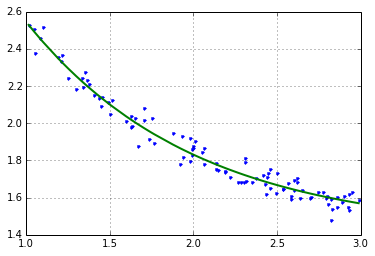

In [40]:
x, y = np.loadtxt('prob4.txt')

def e(x):
    return np.sum(x)/len(x)

def cov(x,y):
    return e(x*y)-(e(x)*e(y))

def var(x):
    return e(x**2)-(e(x)**2)
    
def equation(x,y):
    a = cov(x,y)/var(x)
    c = e(y)-(a*e(x))
    return a,c

a,c = equation(np.exp(-x),y)

plt.plot(x,y,'.')
x.sort()
y2 = [(a*exp(-xx))+c for xx in x]
plt.plot(x,y2,lw=2)
plt.grid()

5) Shipyard. ship_speed_fuel.csv and ship_speed_fuel.txt contains data for fuel consumption and ship speed. You can load them up using loadtxt like shown below.

    Variable Names
    ship_leg (1-5)
    speed    (knots)
    fuel     (tons/day)
    
The plot below show clearly that there are two kinds of ship: small ship and a big ship. 

Source: S.Wang, Q. Meng (2012). "Sailing Speed Optimization for Container
Ships in a Liner Shipping Network," 

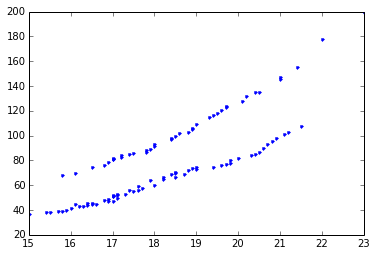

In [42]:
ship = np.loadtxt(open("ship_speed_fuel.csv","rb"), delimiter=',', skiprows=1)
#try to figure out what exactly is in the ship variable
#see ship_speed_fuel.text for the meaning of each column
shipno = ship[:, 0]
speed = ship[:, 1]
fuel = ship[:, 2]
plt.plot(speed, fuel,'.')

5.1) Physics dictates that the bigger the ship the more power it needs to maintain a fixed speed. Figure out which ship 1,2,3,4,5 is a big ship and which ship is a small ship.

Small Ships are : [1, 2, 3]
Big Ships are : [4, 5]


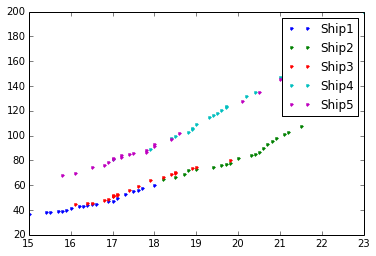

In [95]:
def cov(x,y):
    return e(x*y)-(e(x)*e(y))

def var(x):
    return e(x**2)-(e(x)**2)

def e(x):
    return np.sum(x)/len(x)
    
def equation(x,y):
    a = cov(x,y)/var(x)
    b = e(y)-(a*e(x))
    return a,b

shipno = ship[:, 0]
speed = ship[:, 1]
fuel = ship[:, 2]

d = {0:0}
for i in range(len(shipno)):
    d[shipno[i]] = i+1

big, small = [],[]
threshold = 15.0
for i in range(1,6):
    x = []
    y = []
    for j in range(d[i-1],d[i]):
        x.append(speed[j])
        y.append(fuel[j])
    x = np.array(x)
    y = np.array(y)
    a,b = equation(x,y)
    plt.plot(x,y,'.',label="Ship"+str(i))
    if (a>threshold):
        big.append(i)
    else:
        small.append(i)

print "Small Ships are : " + str(small)
print "Big Ships are : " + str(big)
plt.legend()

5.2) The ship fuel consumption,$c$, for a given speed, $v$ can be modeled with

$$c = a v^b$$

where $a$ and $b$ are parameter you need to find for best fit.

This relation, is however not linear. It nees some manipulation to make it linear. We can take $\ln$ on both side and obtain

$$\ln c = b \ln v + \ln a$$

which is a linear relation. Your job for this one is to find $a$ and $b$ for big ship and small ship. Plot to verify. (You should have two set of parameters one for big ship and one for small ship).

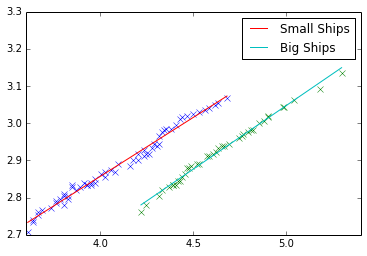

In [129]:
def cov(x,y):
    return e(x*y)-(e(x)*e(y))

def var(x):
    return e(x**2)-(e(x)**2)

def e(x):
    return np.sum(x)/len(x)
    
def equation(x,y):
    a = cov(x,y)/var(x)
    b = e(y)-(a*e(x))
    return a,b

shipno = ship[:, 0]
speed = ship[:, 1]
fuel = ship[:, 2]

cb, cs = [],[]
vb, vs = [],[]

for j in range(60):
    cs.append(speed[j])
    vs.append(fuel[j])
    
for k in range(60,100):
    cb.append(speed[k])
    vb.append(fuel[k])

xs = np.array(np.log(vs))
ys = np.array(np.log(cs))
bs,ln_as = equation(xs,ys)

xb = np.array(np.log(vb))
yb = np.array(np.log(cb))
bb,ln_ab = equation(xb,yb)

plt.plot(xs,ys,'x')
plt.plot(xb,yb,'x')

xs.sort()
xb.sort()
yss = [((bs*xx)+ln_as) for xx in xs]
ybb = [((bb*xx)+ln_ab) for xx in xb]

plt.plot(xs,yss, label="Small Ships")
plt.plot(xb,ybb, label="Big Ships")

plt.ylim(2.7,3.3)
plt.legend()

5.3) (Optional, for fun only.) Suppose that he small ship can carry 1000 tons of good while big ship can carry 2000 tons of good. The cost of ship fuel(bunker) is about 250 Dollar per metric tons. Company normally charge about 0.10 Dollar per ton of good per mile travel.

The faster your ship goes the more trip you can make the more revenue you can get. Yet, at the same time the trip will cost you more cost on fuel.

Your job is to figure out what speed you need to run the ship at for maximum profit and which ship is better for you.